### Ch6_Q08
#### In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

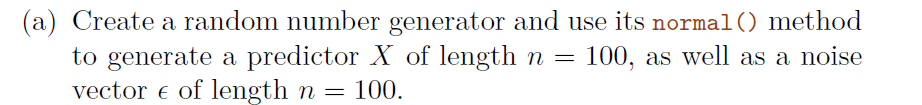

In [167]:
import numpy as np
np.random.seed(68)
X = np.random.normal(0, 1, 100)
epsilon = np.random.normal(0, 1, 100) 
X

array([-0.94447636,  0.19994362, -1.54035342,  0.83804177,  0.39478599,
        0.18248452,  0.40455897,  0.46154204,  0.03503317,  0.45902298,
        0.61492166,  0.0097786 ,  0.46036061,  1.40156502, -0.40874837,
       -0.42748413,  1.92159102,  0.29949334, -0.51008862, -0.26136935,
       -1.20512368,  0.17204051,  0.16261249,  1.64915503,  0.62076659,
        0.87655734,  0.00973054, -0.3572708 ,  1.20406353,  1.12921273,
        0.12311241, -0.00338489, -1.33974266, -1.41122039, -0.39546918,
       -0.84786103,  0.33266892, -0.32217627, -0.94582363,  2.23580862,
        0.37542797, -0.93107558,  1.86150756,  0.75050153, -0.46414891,
        0.65812383,  0.07620643, -0.10270796, -0.19453875, -0.37969294,
        0.89841405,  0.70223241,  0.10717399, -0.09834531, -0.38153928,
       -0.98614816,  1.89793635,  0.51008109, -1.21157802,  1.83980509,
       -0.50429781,  0.16340116, -0.28812985,  1.02594984, -0.27790866,
        0.05826543, -1.46031745,  0.40159206,  2.77735566,  0.49

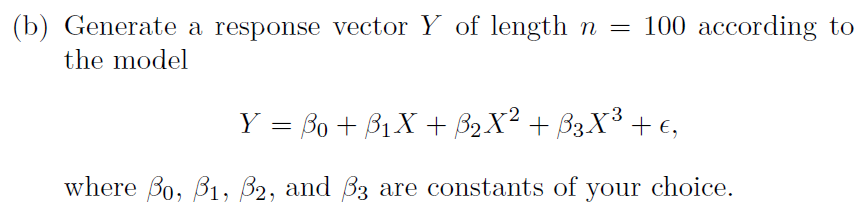

In [168]:
# Choose constants
Beta = np.random.randint(-5, 5, size=4)

# Generate Y based on the model
Y = 0
for i in range(4):
    Y += Beta[i] * X**i
Y += epsilon
Y

array([ -2.42752015,  -4.46863345,  -1.75299696,  -3.26564988,
        -6.27664012,  -4.86482255,  -6.35693678,  -5.64125728,
        -5.61269573,  -6.80261575,  -7.29367064,  -5.82905923,
        -4.7836895 ,   0.53083753,  -2.30585028,  -4.00149958,
        18.81736373,  -5.83083632,  -0.28412156,  -4.46912195,
        -0.974147  ,  -5.90016992,  -5.86461823,   8.60555386,
        -6.79486414,  -6.32859592,  -6.35941249,  -3.24439518,
        -0.27531662,  -3.24148588,  -6.13473378,  -4.4647365 ,
        -0.13575861,   0.20572697,  -2.80638997,  -0.5796723 ,
        -4.59186456,  -0.46675169,  -0.90277859,  32.25984813,
        -5.94659455,  -1.63148318,  13.66985432,  -6.0364608 ,
        -2.25005105,  -6.53283465,  -6.32533588,  -5.62113854,
        -4.61878775,  -2.24496492,  -3.46994578,  -6.62115897,
        -7.09547372,  -5.28209997,  -4.11817253,   1.22586952,
        16.84061781,  -5.86330441,   0.802597  ,  14.65787749,
        -1.83109812,  -7.15321986,  -4.00015951,  -3.06

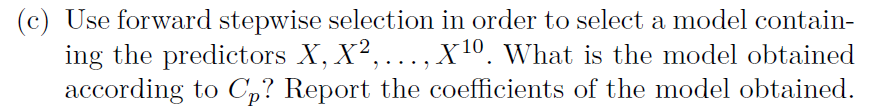

In [169]:
import statsmodels.api as sm
from itertools import combinations

# Generate polynomial terms X, X^2, ..., X^10
X_poly = np.column_stack([X**i for i in range(1, 11)])

# Forward Stepwise Selection
def forward_stepwise(X, y):
    n_features = X.shape[1]
    selected_features = []
    remaining_features = list(range(n_features))
    best_model = None
    best_cp = float('inf')

    for _ in range(n_features):
        best_feature = None
        for feature in remaining_features:
            features = selected_features + [feature]
            X_subset = X[:, features]
            model = sm.OLS(y, sm.add_constant(X_subset)).fit()
            cp = len(features) - model.rsquared * n
            if cp < best_cp:
                best_cp = cp
                best_model = model
                best_feature = feature
        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)

    return best_model, selected_features

forward_model, forward_features = forward_stepwise(X_poly, Y)
feature_names = ["Intercept"] + [f"X{i+1}" for i in forward_features]
forward_coef = pd.DataFrame(forward_model.params, index=feature_names, columns=["Forward Coef."])
pd.options.display.float_format = "{:.10f}".format 
forward_coef


,Forward Coef.
Intercept,-3.8959561369
X4,0.7337882340
X3,1.2196095375


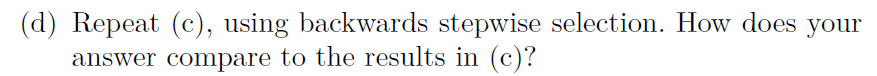

In [170]:
def backward_stepwise(X, y):
    n_features = X.shape[1]
    selected_features = list(range(n_features))
    best_model = None
    best_cp = float('inf')

    for _ in range(n_features):
        worst_feature = None
        for feature in selected_features:
            features = [f for f in selected_features if f != feature]
            X_subset = X[:, features]
            model = sm.OLS(y, sm.add_constant(X_subset)).fit()
            cp = len(features) - model.rsquared * n
            if cp < best_cp:
                best_cp = cp
                best_model = model
                worst_feature = feature
        if worst_feature is not None:
            selected_features.remove(worst_feature)

    return best_model, selected_features

backward_model, backward_features = backward_stepwise(X_poly, Y)
feature_names = ["Intercept"] + [f"X{i+1}" for i in backward_features]
backward_coef = pd.DataFrame(backward_model.params, index=feature_names, columns=["Backward Coef."])
pd.options.display.float_format = "{:.10f}".format 
backward_coef

,Backward Coef.
Intercept,-4.1645563501
X1,-4.2643483359
X3,2.6279301659
X4,0.9941875333
X6,-0.0599519286


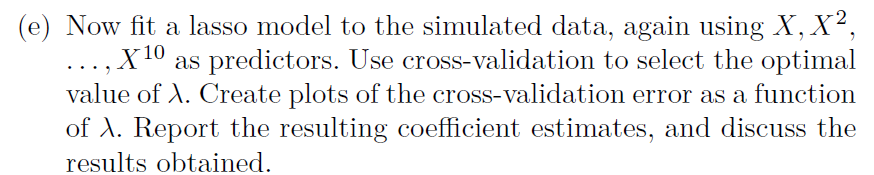

Best lambda: 0.014986240187616027


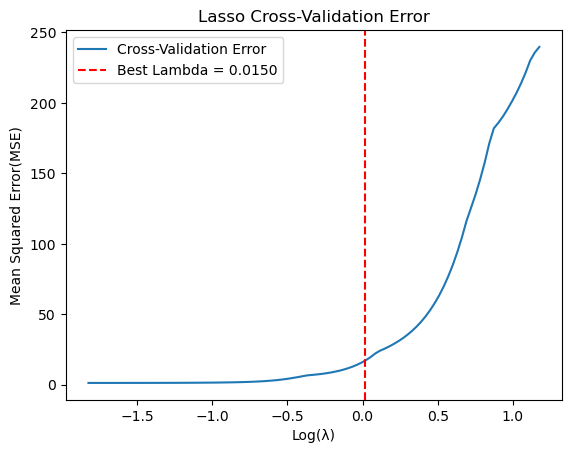

,Lasso Coef.
0,-4.5269865819
1,5.1002955260
2,13.5024612570
3,0.0000000000
4,0.7305403448
5,0.0000000000
6,0.0000000000
7,0.0000000000
8,-0.0000000000
9,-0.0000000000


In [171]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import LogLocator

# Create predictors for Lasso (X, X^2, ..., X^10)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1, 1))

# 特徵標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Fit Lasso with cross-validation
lasso = LassoCV(cv=10, max_iter=10000).fit(X_scaled, Y)

best_lambda = lasso.alpha_
print(f"Best lambda: {best_lambda}")

# Plot cross-validation error
plt.plot(np.log10(lasso.alphas_), lasso.mse_path_.mean(axis=1), label='Cross-Validation Error')
plt.xlabel('Log(λ)')
plt.ylabel('Mean Squared Error(MSE)')
plt.title('Lasso Cross-Validation Error')
plt.axvline(best_lambda, color="red", linestyle="--", label=f"Best Lambda = {best_lambda:.4f}")
plt.legend()
plt.show()

lasso_coefficients = pd.DataFrame(lasso.coef_, columns=["Lasso Coef."])
pd.options.display.float_format = "{:.10f}".format 
lasso_coefficients

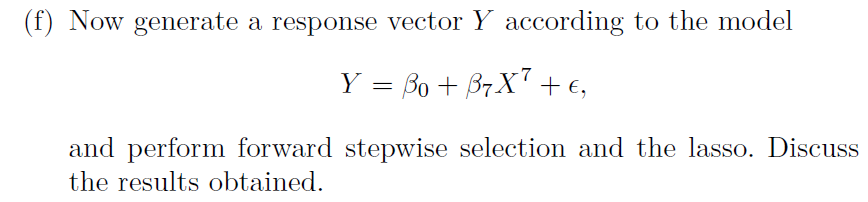

In [172]:
# New coefficients
beta_7 = np.random.randint(-5, 5)

# Generate new Y
Y_new = Beta[0] + beta_7 * X**7 + epsilon

# Forward Stepwise Selection
forward_model_new, forward_features_new = forward_stepwise(X_poly, Y_new)
feature_names = ["Intercept"] + [f"X{i+1}" for i in forward_features_new]
forward_new_coef = pd.DataFrame(forward_model_new.params, index=feature_names, columns=["Forward_new_coef."])
pd.options.display.float_format = "{:.10f}".format 
print(forward_new_coef,'\n')

# Lasso Model
lasso_new = LassoCV(cv=10).fit(X_poly, Y_new)
feature_names = [f"X{i+1}" for i in range(10)]
lasso_new_coef = pd.DataFrame(lasso_new.coef_, index=feature_names, columns=["Lasso_new coef."])
pd.options.display.float_format = "{:.10f}".format 
print(lasso_new_coef)

           Forward_new_coef.
Intercept      -5.0610736530
X7             -1.9998949496 

     Lasso_new coef.
X1     -0.0000000000
X2     -0.0000000000
X3     -0.0000000000
X4     -0.0000000000
X5     -0.0000000000
X6     -0.0000000000
X7     -0.0000000000
X8     -0.0000000000
X9     -0.0000000000
X10    -0.0579469111


#### Discussion
**Forward vs. Backward Stepwise Selection:** Both methods select models, but they may yield slightly different results depending on the order of selection and criteria.<br>
**Lasso Model:** Lasso performs regularization, shrinking some coefficients to zero. Cross-validation helps determine the optimal penalty.<br>
**New Model:** When 𝑌 is generated with 𝑋⁷ as the true predictor, stepwise methods and Lasso identify 𝑋⁷, though Lasso tends to select sparser models.